In [48]:
import pandas as pd
import chardet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from windrose import WindroseAxes
import seaborn as sns

In [49]:
# More precise: replace only in the 'Valore' column
df = pd.read_csv('C:\\YEAR1\\meteo_CG\\nhxnax101_MisureEn_MazVenDV_3_20251121164858.txt', sep=';', encoding='latin-1')

# Replace commas in specific column
df['Valore'] = df['Valore'].astype(str).str.replace(',', '.', regex=False)

# Convert to numeric
df['Valore'] = pd.to_numeric(df['Valore'], errors='coerce')

print("After replacing commas in Valore column:")
print(df.head())
print(f"Valore dtype: {df['Valore'].dtype}")

After replacing commas in Valore column:
           Stazione                           Grandezza Data rilevazione  \
0  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   
1  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   
2  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   
3  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   
4  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   

  Ora rilevazione  Valore  
0           00:00     0.3  
1           01:00     0.6  
2           02:00     0.4  
3           03:00     0.3  
4           04:00     0.6  
Valore dtype: float64


In [50]:
# Count NaN before dropping
nan_before = df['Valore'].isna().sum()
total_before = len(df)
print(f"Before dropping: {nan_before} NaN values out of {total_before} total rows")

# Drop rows where 'Valore' is NaN
df_clean = df.dropna(subset=['Valore'])

# Count after dropping
nan_after = df_clean['Valore'].isna().sum()
total_after = len(df_clean)
print(f"After dropping: {nan_after} NaN values out of {total_after} total rows")
print(f"Removed {nan_before - nan_after} rows")
print(f"Remaining data: {total_after} rows ({total_after/total_before*100:.1f}% of original)")

Before dropping: 489 NaN values out of 49104 total rows
After dropping: 0 NaN values out of 48615 total rows
Removed 489 rows
Remaining data: 48615 rows (99.0% of original)


In [51]:
for i, column in enumerate(df.columns):
    print(f"{i}: {column}")

0: Stazione
1: Grandezza
2: Data rilevazione
3: Ora rilevazione
4: Valore


In [52]:
# Check the actual column names
print("DataFrame columns:")
print(df.columns.tolist())
print("\nFirst few rows:")
print(df.head())

DataFrame columns:
['Stazione', 'Grandezza', 'Data rilevazione', 'Ora rilevazione', 'Valore']

First few rows:
           Stazione                           Grandezza Data rilevazione  \
0  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   
1  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   
2  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   
3  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   
4  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   

  Ora rilevazione  Valore  
0           00:00     0.3  
1           01:00     0.6  
2           02:00     0.4  
3           03:00     0.3  
4           04:00     0.6  


In [53]:
# Manual datetime conversion
df['DataOra'] = pd.to_datetime(
    df['Data rilevazione'] + ' ' + df['Ora rilevazione'], 
    dayfirst=True,  # Important for DD/MM/YYYY format
    format='%d/%m/%Y %H:%M'
)

# Verify datetime conversion
print("After datetime conversion:")
print(df[['Data rilevazione', 'Ora rilevazione', 'DataOra']].head())
print(f"\nDataOra dtype: {df['DataOra'].dtype}")

# Now extract time components
df['Year'] = df['DataOra'].dt.year
df['Month'] = df['DataOra'].dt.month
df['Season'] = df['DataOra'].dt.month % 12 // 3 + 1
df['YearMonth'] = df['DataOra'].dt.to_period('M')

season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'}
df['Season_Name'] = df['Season'].map(season_map)

print("\nDataFrame with time components:")
print(df.head())

After datetime conversion:
  Data rilevazione Ora rilevazione             DataOra
0       01/01/2023           00:00 2023-01-01 00:00:00
1       01/01/2023           01:00 2023-01-01 01:00:00
2       01/01/2023           02:00 2023-01-01 02:00:00
3       01/01/2023           03:00 2023-01-01 03:00:00
4       01/01/2023           04:00 2023-01-01 04:00:00

DataOra dtype: datetime64[ns]

DataFrame with time components:
           Stazione                           Grandezza Data rilevazione  \
0  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   
1  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   
2  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   
3  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   
4  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   

  Ora rilevazione  Valore             DataOra  Year  Month  Season YearMonth  \
0           00:00     0.3 2023-01-01 00:00

In [54]:
# Define date range
start_date = '2024-05-01'
end_date = '2025-05-31'

# Create subset
mask = (df['DataOra'] >= start_date) & (df['DataOra'] <= end_date)
df_subset = df.loc[mask].copy()

print(f"Original data: {len(df)} rows")
print(f"Subset data: {len(df_subset)} rows")
print(f"Date range in subset: {df_subset['DataOra'].min()} to {df_subset['DataOra'].max()}")

Original data: 49104 rows
Subset data: 18962 rows
Date range in subset: 2024-05-01 00:00:00 to 2025-05-31 00:00:00


In [55]:
df_subset['Grandezza'].head(10)

11664    Velocità vento 2m istantanea (m/s)
11665    Velocità vento 2m istantanea (m/s)
11666    Velocità vento 2m istantanea (m/s)
11667    Velocità vento 2m istantanea (m/s)
11668    Velocità vento 2m istantanea (m/s)
11669    Velocità vento 2m istantanea (m/s)
11670    Velocità vento 2m istantanea (m/s)
11671    Velocità vento 2m istantanea (m/s)
11672    Velocità vento 2m istantanea (m/s)
11673    Velocità vento 2m istantanea (m/s)
Name: Grandezza, dtype: object

In [65]:

df_subset.head(10)


,Stazione,Grandezza,Data rilevazione,Ora rilevazione,Valore,DataOra,Year,Month,Season,YearMonth,Season_Name
11664,Mazara del Vallo,Velocità vento 2m istantanea (m/s),01/05/2024,00:00,4.8,2024-05-01 00:00:00,2024,5,2,2024-05,Spring
11665,Mazara del Vallo,Velocità vento 2m istantanea (m/s),01/05/2024,01:00,5.5,2024-05-01 01:00:00,2024,5,2,2024-05,Spring
11666,Mazara del Vallo,Velocità vento 2m istantanea (m/s),01/05/2024,02:00,7.6,2024-05-01 02:00:00,2024,5,2,2024-05,Spring
11667,Mazara del Vallo,Velocità vento 2m istantanea (m/s),01/05/2024,03:00,5.0,2024-05-01 03:00:00,2024,5,2,2024-05,Spring
11668,Mazara del Vallo,Velocità vento 2m istantanea (m/s),01/05/2024,04:00,6.6,2024-05-01 04:00:00,2024,5,2,2024-05,Spring
11669,Mazara del Vallo,Velocità vento 2m istantanea (m/s),01/05/2024,05:00,7.2,2024-05-01 05:00:00,2024,5,2,2024-05,Spring
11670,Mazara del Vallo,Velocità vento 2m istantanea (m/s),01/05/2024,06:00,2.3,2024-05-01 06:00:00,2024,5,2,2024-05,Spring
11671,Mazara del Vallo,Velocità vento 2m istantanea (m/s),01/05/2024,07:00,1.5,2024-05-01 07:00:00,2024,5,2,2024-05,Spring
11672,Mazara del Vallo,Velocità vento 2m istantanea (m/s),01/05/2024,08:00,1.5,2024-05-01 08:00:00,2024,5,2,2024-05,Spring
11673,Mazara del Vallo,Velocità vento 2m istantanea (m/s),01/05/2024,09:00,2.4,2024-05-01 09:00:00,2024,5,2,2024-05,Spring


In [66]:
# Filter for wind speed and direction data only
vv2m_df_subset = df_subset[df_subset['Grandezza'].str.contains('Velocità vento 2m istantanea', na=False)].copy()
vv2m_df_subset ['ws_2m'] = vv2m_df_subset ['Valore']
vD2m_df_subset = df_subset[df_subset['Grandezza'].str.contains('Direzione vento 2m istantanea', na=False)].copy()
vD2m_df_subset ['wd_2m'] = vD2m_df_subset ['Valore']




In [78]:
# Select only the columns you need to avoid any conflicts
wind_5_24_25 = vv2m_df_subset[['DataOra', 'ws_2m' ]].merge(
    vD2m_df_subset[['DataOra', 'wd_2m']],
    on='DataOra',
    how='inner'
)

print(f"wind_5_24_25 created with {len(wind_5_24_25)} rows")
print(f"vv2m_df_subset created with {len(vv2m_df_subset)} rows")
print(f"vD2m_df_subset created with {len(vD2m_df_subset)} rows")

wind_5_24_25 created with 9481 rows
vv2m_df_subset created with 9481 rows
vD2m_df_subset created with 9481 rows


In [ ]:

#Prepare the Data and Calculate Wind Sectors
# Add wind direction sectors (8-point compass)
def direction_to_sector(direction):
    """Convert wind direction in degrees to 8-point compass sectors"""
    sectors = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
    sector_bounds = [22.5, 67.5, 112.5, 157.5, 202.5, 247.5, 292.5, 337.5]
    
    for i, bound in enumerate(sector_bounds):
        if direction < bound:
            return sectors[i]
    return 'N'  # For directions between 337.5 and 360/0

# Apply sector classification
wind_5_24_25['Wind_Sector'] = wind_5_24_25['wd_2m'].apply(direction_to_sector)

print("Wind Sector Distribution:")
print(wind_5_24_25['Wind_Sector'].value_counts().sort_index())

Wind Sector Distribution:
Wind_Sector
E     1078
N     2091
NE     984
NW    1470
S      908
SE    1775
SW     545
W      630
Name: count, dtype: int64


C:\Users\EnricoMancinelli\AppData\Local\Temp\ipykernel_4136\2592519838.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


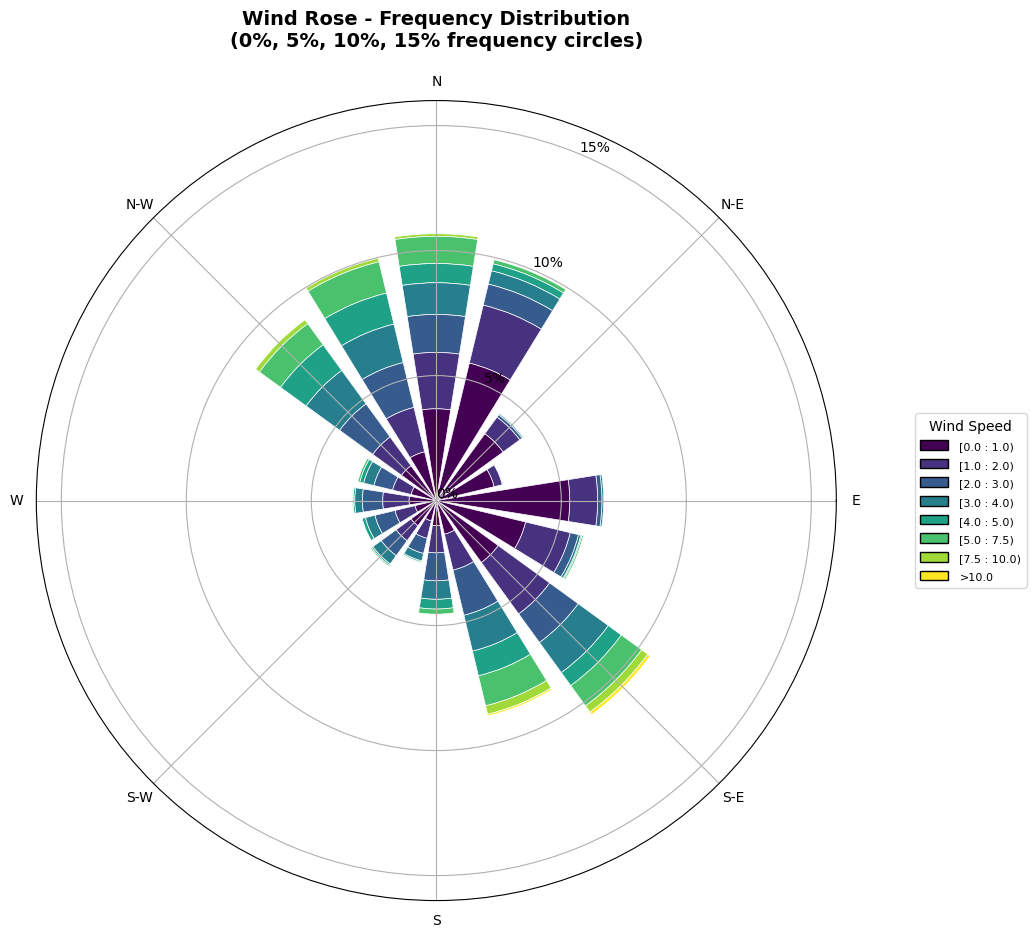

In [81]:
#Create Wind Rose with Frequency Count

def create_wind_rose_frequency(df, wind_speed_col='ws_2m', direction_col='wd_2m'):
    """
    Create wind rose with frequency counts (0%, 5%, 10%, 15%)
    """
    # Extract wind data
    ws = df[wind_speed_col].values
    wd = df[direction_col].values
    
    # Create figure
    fig = plt.figure(figsize=(12, 10))
    ax = WindroseAxes.from_ax(fig=fig)
    
    # Define wind speed thresholds (adjust based on your data)
    speed_bins = [0, 1, 2, 3, 4, 5, 7.5, 10]  # m/s
    
    # Plot wind rose with frequency counts
    ax.bar(wd, ws, 
           normed=True,  # Show frequencies as percentages
           opening=0.8,  # Opening between bars
           edgecolor='white',
           linewidth=0.5,
           bins=speed_bins,
           cmap=plt.cm.viridis)
    
    # Customize the plot with frequency circles
    ax.set_yticks([0, 5, 10, 15])  # 0%, 5%, 10%, 15% frequency circles
    ax.set_yticklabels(['0%', '5%', '10%', '15%'])
    ax.set_ylim(0, 16)  # Set limit to show 15% circle clearly
    
    # Add legend and title
    legend_labels = [f'{speed_bins[i]}-{speed_bins[i+1]} m/s' for i in range(len(speed_bins)-1)]
    ax.set_legend(title='Wind Speed', labels=legend_labels, 
                  loc='center left', bbox_to_anchor=(1.1, 0.5))
    
    ax.set_title('Wind Rose - Frequency Distribution\n(0%, 5%, 10%, 15% frequency circles)', 
                 fontsize=14, fontweight='bold', pad=20)
    
    plt.tight_layout()
    return fig, ax

# Create the wind rose
fig, ax = create_wind_rose_frequency(wind_5_24_25)
plt.show()